In [1]:
import pandas as pd

In [2]:
#!unzip "san francisco crimes.zip"

Archive:  san francisco crimes.zip
  inflating: san francisco crimes.csv  


# Preliminaries

This dataset, also available (with minor modifications) from [SF crimes competition in Kaggle](https://www.kaggle.com/c/sf-crime), is pretty large, so in order to save the upload from my local directory I mount the notebook onto my drive using the `mount()` method.

In [2]:
!head -n 5 "san francisco crimes.csv"

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df_crimes = pd.read_csv('san francisco crimes.csv', parse_dates=['Dates'], index_col='Dates')
df_crimes.sample(10)

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2007-09-17 20:36:00,NON-CRIMINAL,TRAFFIC ACCIDENT,Monday,BAYVIEW,NONE,GILMAN AV / JENNINGS ST,-122.393739,37.721409
2005-04-18 20:00:00,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Monday,PARK,NONE,100 Block of WOODLAND AV,-122.453388,37.762076
2009-10-17 02:50:00,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Saturday,BAYVIEW,NONE,1000 Block of FITZGERALD AV,-122.388416,37.719196
2005-12-12 10:00:00,SUSPICIOUS OCC,SUSPICIOUS OCCURRENCE,Monday,SOUTHERN,NONE,400 Block of HOWARD ST,-122.395552,37.788840
2013-10-03 09:30:00,LARCENY/THEFT,GRAND THEFT FROM PERSON,Thursday,SOUTHERN,NONE,7TH ST / MISSION ST,-122.410939,37.779212
2009-07-08 19:30:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Wednesday,NORTHERN,PSYCHOPATHIC CASE,100 Block of FELL ST,-122.420332,37.776208
2014-04-16 10:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,NORTHPOINT ST / BAKER ST,-122.407279,37.807419
2007-07-14 17:00:00,LARCENY/THEFT,ATTEMPTED THEFT FROM LOCKED VEHICLE,Saturday,TARAVAL,NONE,LINCOLN WY / 40TH AV,-122.499760,37.764449
2007-06-30 12:00:00,OTHER OFFENSES,MISCELLANEOUS INVESTIGATION,Saturday,SOUTHERN,NONE,800 Block of BRYANT ST,-122.403405,37.775421


In [4]:
df_crimes.shape

(878049, 8)

# Data inspection

Make yourself familiar with the data by answering questions like what do the columns mean, what are their types and what are their values and distribution.

> **Note:** This part has no strict flow, and it just encourages you to have a thorough look on the data before moving on.

### Solution

In [5]:
df_crimes.columns

Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y'],
      dtype='object')

In [6]:
df_crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 878049 entries, 2015-05-13 23:53:00 to 2003-01-06 00:01:00
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Category    878049 non-null  object 
 1   Descript    878049 non-null  object 
 2   DayOfWeek   878049 non-null  object 
 3   PdDistrict  878049 non-null  object 
 4   Resolution  878049 non-null  object 
 5   Address     878049 non-null  object 
 6   X           878049 non-null  float64
 7   Y           878049 non-null  float64
dtypes: float64(2), object(6)
memory usage: 60.3+ MB


In [7]:
# Any missing values in any of the columns?
df_crimes.isnull().sum(axis=0)

Category      0
Descript      0
DayOfWeek     0
PdDistrict    0
Resolution    0
Address       0
X             0
Y             0
dtype: int64

In [8]:
# Any missing values in any of the rows?
# (of course not, given the results above...)
df_crimes.isnull().sum(axis=1).value_counts()

0    878049
dtype: int64

In [9]:
df_crimes.nunique()

Category         39
Descript        879
DayOfWeek         7
PdDistrict       10
Resolution       17
Address       23228
X             34243
Y             34243
dtype: int64

<AxesSubplot:>

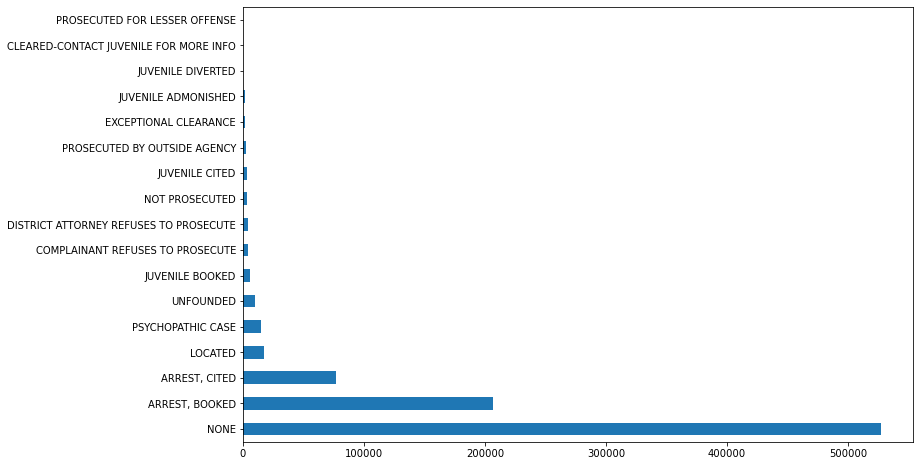

In [10]:
df_crimes.Resolution.value_counts().plot.barh(figsize=(12, 8))

<AxesSubplot:>

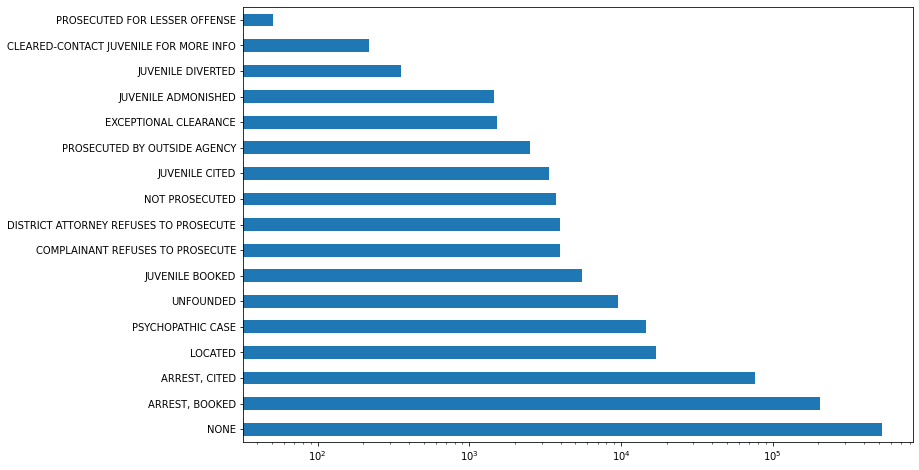

In [11]:
# Looks like using log scale is in order
df_crimes.Resolution.value_counts().plot.barh(logx=True, figsize=(12, 8)) # to analyze small categories use log scale logx=True

<AxesSubplot:>

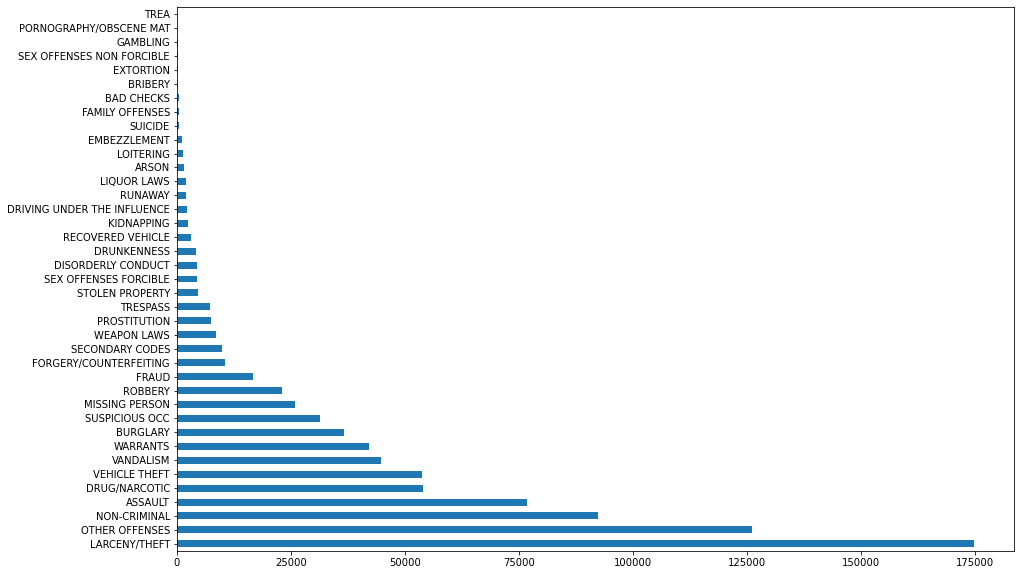

In [12]:
df_crimes.Category.value_counts().plot.barh(figsize=(15, 10))

# Data cleaning

In [13]:
df_crimes.Category.unique()

array(['WARRANTS', 'OTHER OFFENSES', 'LARCENY/THEFT', 'VEHICLE THEFT',
       'VANDALISM', 'NON-CRIMINAL', 'ROBBERY', 'ASSAULT', 'WEAPON LAWS',
       'BURGLARY', 'SUSPICIOUS OCC', 'DRUNKENNESS',
       'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC', 'STOLEN PROPERTY',
       'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON', 'FRAUD',
       'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'ARSON', 'FAMILY OFFENSES', 'LIQUOR LAWS', 'BRIBERY',
       'EMBEZZLEMENT', 'SUICIDE', 'LOITERING',
       'SEX OFFENSES NON FORCIBLE', 'EXTORTION', 'GAMBLING', 'BAD CHECKS',
       'TREA', 'RECOVERED VEHICLE', 'PORNOGRAPHY/OBSCENE MAT'],
      dtype=object)

#### Remove records of the categories 'OTHER OFFENSES' and 'NON-CRIMINAL', and also categories with less than 100 records.

#### Solution

In [14]:
df_crimes.Category.value_counts()

LARCENY/THEFT                  174900
OTHER OFFENSES                 126182
NON-CRIMINAL                    92304
ASSAULT                         76876
DRUG/NARCOTIC                   53971
VEHICLE THEFT                   53781
VANDALISM                       44725
WARRANTS                        42214
BURGLARY                        36755
SUSPICIOUS OCC                  31414
MISSING PERSON                  25989
ROBBERY                         23000
FRAUD                           16679
FORGERY/COUNTERFEITING          10609
SECONDARY CODES                  9985
WEAPON LAWS                      8555
PROSTITUTION                     7484
TRESPASS                         7326
STOLEN PROPERTY                  4540
SEX OFFENSES FORCIBLE            4388
DISORDERLY CONDUCT               4320
DRUNKENNESS                      4280
RECOVERED VEHICLE                3138
KIDNAPPING                       2341
DRIVING UNDER THE INFLUENCE      2268
RUNAWAY                          1946
LIQUOR LAWS 

In [15]:
df_crimes.Category.isin(['NON-CRIMINAL', 'OTHER OFFENSES'])

Dates
2015-05-13 23:53:00    False
2015-05-13 23:53:00     True
2015-05-13 23:33:00     True
2015-05-13 23:30:00    False
2015-05-13 23:30:00    False
                       ...  
2003-01-06 00:15:00    False
2003-01-06 00:01:00    False
2003-01-06 00:01:00    False
2003-01-06 00:01:00    False
2003-01-06 00:01:00    False
Name: Category, Length: 878049, dtype: bool

In [ ]:
df_crimes[df_crimes.Category.isin(['NON-CRIMINAL', 'OTHER OFFENSES'])]

In [16]:
df_crimes = df_crimes.loc[~df_crimes.Category.isin(['NON-CRIMINAL', 'OTHER OFFENSES'])]
df_crimes.shape

(659563, 8)

#### Drop categories with less than ~100 records. Alternatively, drop the most rare categories until you get ~99% percents of the data.

#### Solution

In [17]:
# Drop categories with less than ~100 records
df_crimes = (
    df_crimes
    .groupby('Category')
    .filter(lambda grp: len(grp) > 100)
)
df_crimes.shape

(659535, 8)

In [18]:
# Drop the most rare categories until you get ~99% percents of the data.

category_index = (
    df_crimes
    .Category
    .value_counts(normalize=True)
    .cumsum()
    .searchsorted(0.99)
)

category_index

24

In [19]:
keep_categories = df_crimes.Category.value_counts(normalize=True).iloc[:category_index].index
keep_categories

Index(['LARCENY/THEFT', 'ASSAULT', 'DRUG/NARCOTIC', 'VEHICLE THEFT',
       'VANDALISM', 'WARRANTS', 'BURGLARY', 'SUSPICIOUS OCC', 'MISSING PERSON',
       'ROBBERY', 'FRAUD', 'FORGERY/COUNTERFEITING', 'SECONDARY CODES',
       'WEAPON LAWS', 'PROSTITUTION', 'TRESPASS', 'STOLEN PROPERTY',
       'SEX OFFENSES FORCIBLE', 'DISORDERLY CONDUCT', 'DRUNKENNESS',
       'RECOVERED VEHICLE', 'KIDNAPPING', 'DRIVING UNDER THE INFLUENCE',
       'RUNAWAY'],
      dtype='object')

In [20]:
df_crimes = df_crimes.loc[df_crimes.Category.isin(keep_categories)]
df_crimes.shape

(651484, 8)

#### Draw a scatter plot of X and Y, and remove the outliers based on what you see.

#### Solution

<AxesSubplot:xlabel='X', ylabel='Y'>

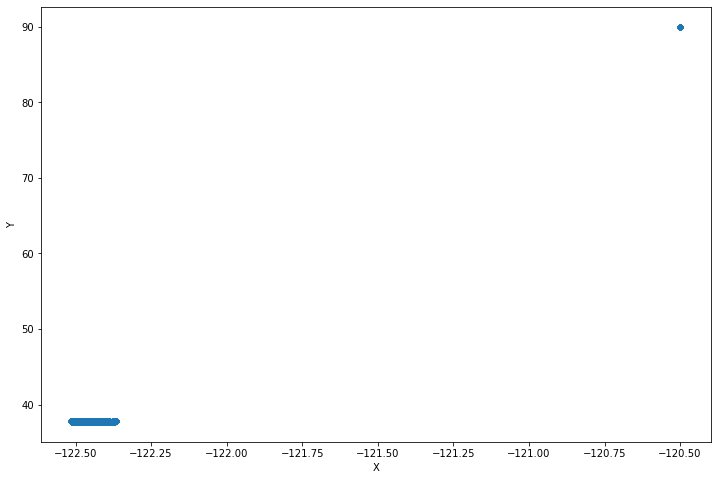

In [21]:
df_crimes.plot.scatter(x='X', y='Y', figsize=(12, 8))

In [22]:
len(df_crimes[df_crimes['Y'] > 80])

46

In [23]:
df_crimes[df_crimes['Y'] > 80]

,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
Dates,,,,,,,,
2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0
2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0
2005-11-28 16:04:00,TRESPASS,TRESPASSING,Monday,TENDERLOIN,"ARREST, BOOKED",ELLIS ST / 5THSTNORTH ST,-120.5,90.0
2005-10-23 20:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,RICHMOND,NONE,AVENUE OF THE PALMS / GEARY BL,-120.5,90.0
2005-10-23 18:11:00,WARRANTS,ENROUTE TO OUTSIDE JURISDICTION,Sunday,TARAVAL,"ARREST, BOOKED",STCHARLES AV / 19TH AV,-120.5,90.0
2005-10-22 16:00:00,LARCENY/THEFT,PETTY THEFT OF PROPERTY,Saturday,TENDERLOIN,NONE,OFARRELL ST / 5THSTNORTH ST,-120.5,90.0
2005-10-21 10:15:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,SOUTHERN,NONE,BRANNAN ST / 1ST ST,-120.5,90.0
2005-10-18 20:00:00,VEHICLE THEFT,STOLEN AUTOMOBILE,Tuesday,PARK,NONE,TURK ST / STJOSEPHS AV,-120.5,90.0


In [24]:
df_crimes = df_crimes.loc[df_crimes['Y'] < 80, :]
df_crimes.shape

(651438, 8)

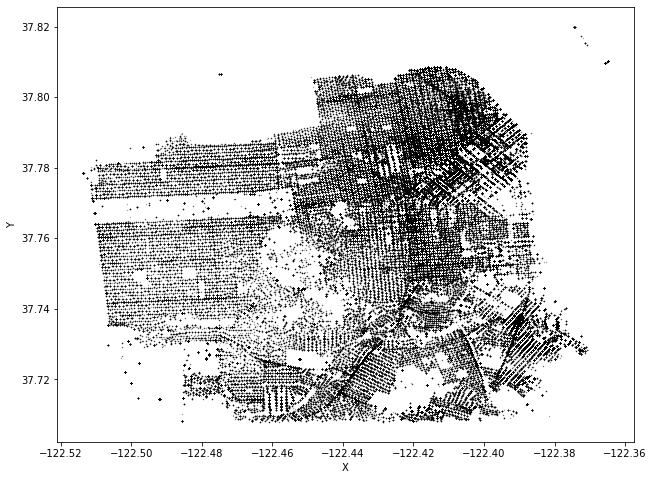

In [25]:
ax = df_crimes.plot.scatter(x='X', y='Y', c="k", s=0.1, alpha=0.5, figsize=(12, 8))
ax.set_aspect(1)    # set the aspect ratio between the Y axis and the X axis

Here is the real map for reference...

<img src="https://s.hdnux.com/photos/07/56/12/2024117/9/920x920.jpg"
     alt="San-Francisco map"
     height=400>


In [26]:
df_crimes.Category.unique()

array(['WARRANTS', 'LARCENY/THEFT', 'VEHICLE THEFT', 'VANDALISM',
       'ROBBERY', 'ASSAULT', 'WEAPON LAWS', 'BURGLARY', 'SUSPICIOUS OCC',
       'DRUNKENNESS', 'FORGERY/COUNTERFEITING', 'DRUG/NARCOTIC',
       'STOLEN PROPERTY', 'SECONDARY CODES', 'TRESPASS', 'MISSING PERSON',
       'FRAUD', 'KIDNAPPING', 'RUNAWAY', 'DRIVING UNDER THE INFLUENCE',
       'SEX OFFENSES FORCIBLE', 'PROSTITUTION', 'DISORDERLY CONDUCT',
       'RECOVERED VEHICLE'], dtype=object)

In [27]:
cat_1 = "DRUG/NARCOTIC"
cat_2 = "DRUNKENNESS"

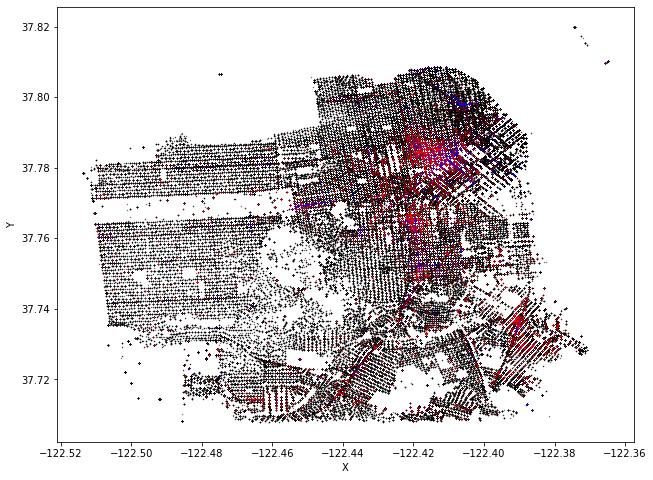

In [28]:
# Highlight certain crime categories on the map

ax = (
    df_crimes
    [~df_crimes.Category.isin([cat_1, cat_2])]
    .plot
    .scatter(x='X', y='Y', c="k", s=0.1, alpha=0.8, figsize=(12, 8))
)

ax = df_crimes[df_crimes.Category == cat_1].plot.scatter(x='X', y='Y', c="r", s=0.1, alpha=0.5, ax=ax)
ax = df_crimes[df_crimes.Category == cat_2].plot.scatter(x='X', y='Y', c="b", s=0.1, alpha=0.5, ax=ax)
ax.set_aspect(1)

# Visualizations

#### Show that 'Drunkness' crimes are more frequent in the weekend. What about other categories?

#### Solution

<AxesSubplot:xlabel='DayOfWeek'>

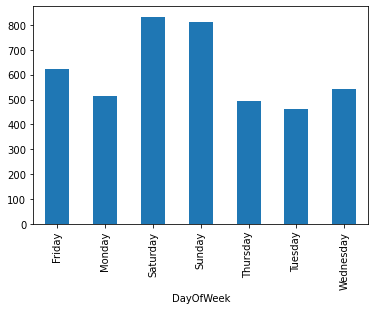

In [29]:
(
    df_crimes
    [df_crimes.Category == 'DRUNKENNESS']
    .groupby('DayOfWeek')
    ['X'] # column without nulls
    .count()
    .plot.bar()
)

<AxesSubplot:ylabel='DayOfWeek'>

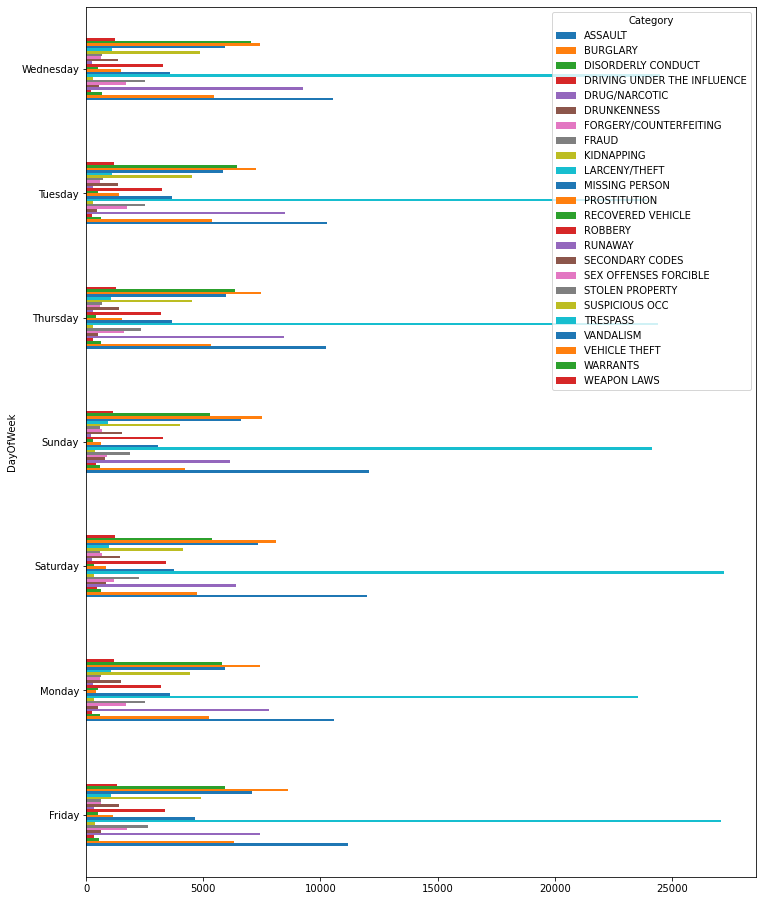

In [30]:
# [extra] Other categories
(
  df_crimes
  .groupby(["DayOfWeek", "Category"])
  .X
  .count()
  .unstack(1)
  .plot.barh(figsize=(12, 16))
)

In [31]:
# [extra] Same as above, but custom-ordering the labels (i.e., day of week order)

df_crimes2 = df_crimes.copy()
df_crimes2["DayNum"] = df_crimes2["DayOfWeek"].replace({
    "Monday": 1, "Tuesday": 2, "Wednesday": 3, "Thursday": 4, "Friday": 5, "Saturday": 6, "Sunday": 7
})

In [32]:
df_crimes2.loc[:, ["DayOfWeek", "DayNum"]]

,DayOfWeek,DayNum
Dates,,
2015-05-13 23:53:00,Wednesday,3
2015-05-13 23:30:00,Wednesday,3
2015-05-13 23:30:00,Wednesday,3
2015-05-13 23:30:00,Wednesday,3
2015-05-13 23:30:00,Wednesday,3
...,...,...
2003-01-06 00:15:00,Monday,1
2003-01-06 00:01:00,Monday,1
2003-01-06 00:01:00,Monday,1


[Text(0, 0, 'Monday'),
 Text(0, 1, 'Tuesday'),
 Text(0, 2, 'Wednesday'),
 Text(0, 3, 'Thursday'),
 Text(0, 4, 'Friday'),
 Text(0, 5, 'Saturday'),
 Text(0, 6, 'Sunday')]

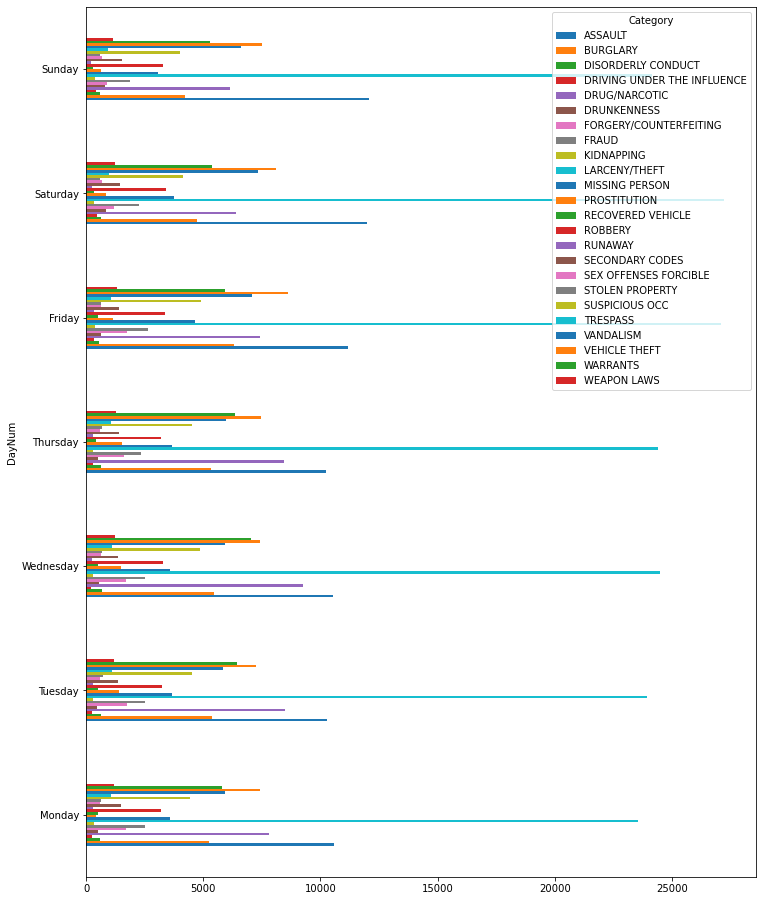

In [33]:
ax = (
    df_crimes2
    .sort_values(by="DayNum")
    .groupby(["DayNum", "Category"])
    .X
    .count()
    .unstack(1)
    .plot.barh(figsize=(12, 16))
)
ax.set_yticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

#### Visualize the number of vehicle thefts for each day-of-week and hour-of-day. What is the worst time for leaving your car unattended?

In [34]:
df_crimes.reset_index().Dates.dt.hour # accessot dt for dates

0         23
1         23
2         23
3         23
4         23
          ..
651433     0
651434     0
651435     0
651436     0
651437     0
Name: Dates, Length: 651438, dtype: int64

#### Solution

In [35]:
df_crimes.columns

Index(['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution',
       'Address', 'X', 'Y'],
      dtype='object')

In [36]:
# Create a new "Hour" column (extract the hour from the datetime index)
df_crimes["Hour"] = df_crimes.index.hour

<AxesSubplot:xlabel='Hour'>

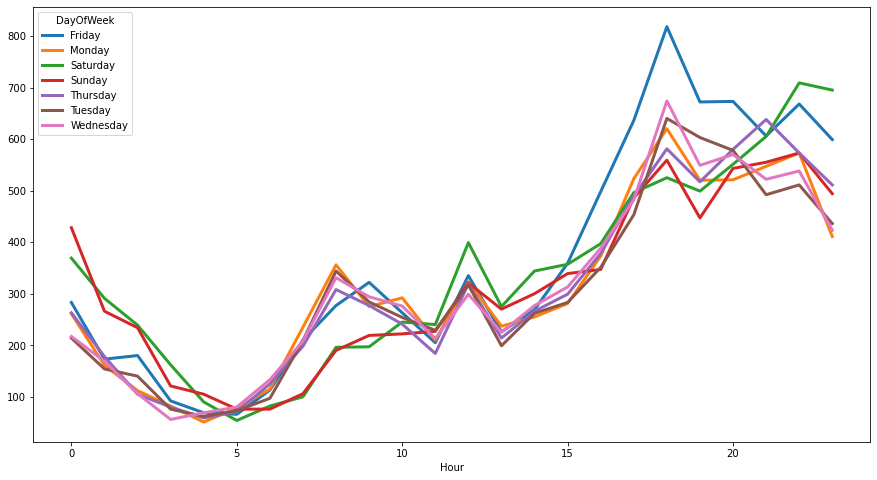

In [37]:
(
    df_crimes
    [df_crimes.Category == 'VEHICLE THEFT'] # we don't answewr the questions, the peaaks are time of report
    .groupby(["Hour", "DayOfWeek"])
    .X
    .count()
    .unstack(1)
    .plot(figsize=(15,8), linewidth=3)
)

<AxesSubplot:xlabel='Hour'>

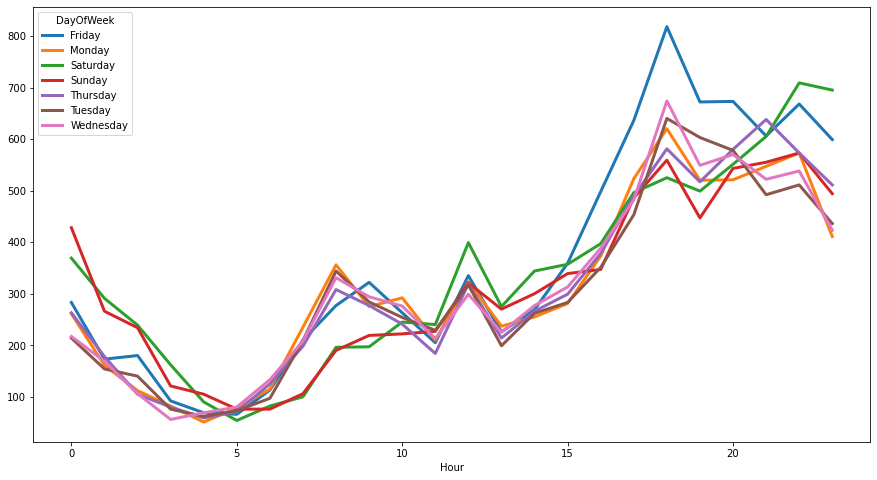

In [38]:
# [extra] Advanced Pandas: same solution by using Pivot Table
(
    df_crimes
    [df_crimes.Category=='VEHICLE THEFT']
    .pivot_table(index='Hour', columns='DayOfWeek', values='X', aggfunc='count')
    .plot(figsize=(15,8), linewidth=3)
)

#### Use a bar plot to show for each category how many crimes occurred on a street corner.

In [39]:
df_crimes.sample(20).Address

Dates
2005-03-10 08:30:00        600 Block of HAMILTON ST
2012-10-16 08:20:00            0 Block of MYRTLE ST
2013-03-23 22:00:00          200 Block of SADOWA ST
2011-12-30 12:15:00         200 Block of REDROCK WY
2005-05-02 18:30:00           1400 Block of EDDY ST
2005-06-16 17:20:00     MCALLISTER ST / FILLMORE ST
2013-01-22 18:00:00      LAPU-LAPU ST / HARRISON ST
2010-08-15 00:03:00         1700 Block of MARKET ST
2006-01-26 15:47:00              EDDY ST / JONES ST
2004-01-10 22:00:00        BROADWAY ST / BATTERY ST
2003-11-11 10:00:00        500 Block of GUERRERO ST
2007-12-02 18:00:00            700 Block of 23RD AV
2014-03-03 16:50:00       1300 Block of FILLMORE ST
2005-05-05 15:34:00       MANSELL ST / SAN BRUNO AV
2009-11-13 15:00:00    500 Block of JOHNFKENNEDY DR
2004-10-15 13:00:00        200 Block of GONZALEZ DR
2013-07-12 19:00:00              MARKET ST / 5TH ST
2014-02-18 18:09:00        2300 Block of MISSION ST
2009-05-01 12:30:00           800 Block of JUDAH ST
2005-0

#### Solution

In [40]:
df_crimes['is_corner'] = df_crimes.Address.str.contains('/')

In [41]:
# For each category how many crimes occurred on a street corner
corners = (
    df_crimes
    .groupby(['Category', 'is_corner'])
    .size()
    .unstack()
)
corners.head(5)

is_corner,False,True
Category,,
ASSAULT,61446,15426
BURGLARY,36316,438
DISORDERLY CONDUCT,3054,1264
DRIVING UNDER THE INFLUENCE,851,1417
DRUG/NARCOTIC,34052,19919


<AxesSubplot:xlabel='Category'>

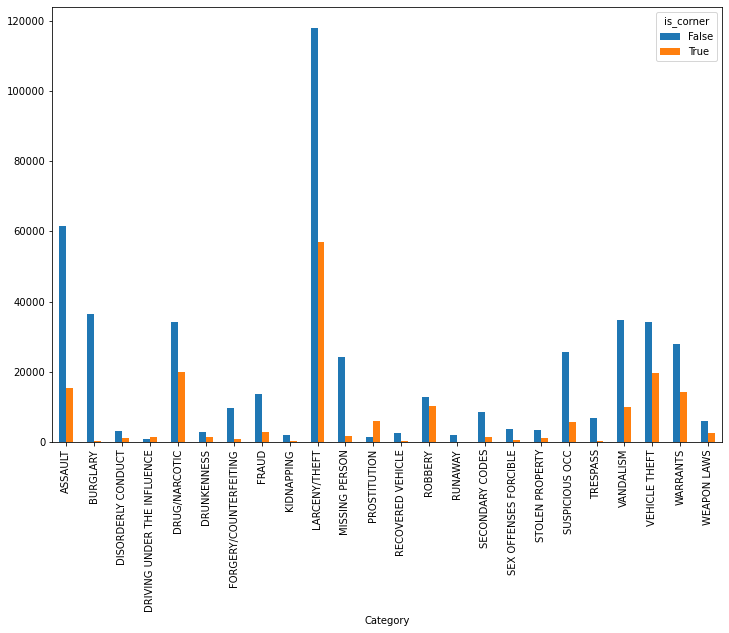

In [42]:
corners.plot.bar(figsize=(12,8))

#### [extra] Find the category with the highest ratio of street-corner crimes.

In [43]:
# Which crime is more common on street corners?

(
    # Happend for a category on street corner / all happened for a category
    (corners[True] / corners.sum(axis=1))
    # .idxmax()
)

Category
ASSAULT                        0.200671
BURGLARY                       0.011917
DISORDERLY CONDUCT             0.292728
DRIVING UNDER THE INFLUENCE    0.624780
DRUG/NARCOTIC                  0.369069
DRUNKENNESS                    0.326402
FORGERY/COUNTERFEITING         0.078612
FRAUD                          0.171533
KIDNAPPING                     0.179838
LARCENY/THEFT                  0.325768
MISSING PERSON                 0.065104
PROSTITUTION                   0.790086
RECOVERED VEHICLE              0.138942
ROBBERY                        0.442411
RUNAWAY                        0.020041
SECONDARY CODES                0.135103
SEX OFFENSES FORCIBLE          0.163209
STOLEN PROPERTY                0.260630
SUSPICIOUS OCC                 0.182032
TRESPASS                       0.047782
VANDALISM                      0.221559
VEHICLE THEFT                  0.364056
WARRANTS                       0.337132
WEAPON LAWS                    0.288603
dtype: float64

# [optional] More questions

#### Find the category with the highest ratio of 'Psychpathic case' resolution.

#### Solution

In [ ]:
df_crimes.Resolution.value_counts()

In [ ]:
def f(grp, res):
    counts = grp.Resolution.value_counts()
    # Not all crime categories feature all resultions
    if res in counts.index:
        return counts[res] / float(len(grp))
    else:
        return 0

In [ ]:
(
    df_crimes
    .groupby('Category')
    .apply(f, 'PSYCHOPATHIC CASE')
    .sort_values(ascending=False)
    .head()
)

#### What is the street with the highest number of burgleries?

In [ ]:
df_crimes.Address.sample(30)

#### Solution

In [ ]:
burgs_streets = df_crimes.loc[df_crimes.Category == 'BURGLARY', 'Address']
streets = burgs_streets.str.replace('\d+ Block of', '')  # Clean value
streets = streets.str.split('/', expand=True)             # Street corners
streets = streets.stack().str.strip()
streets.value_counts().head()